In [1]:
from scipy.stats import norm, lognorm, poisson, expon, beta, gamma, boxcox, boxcox_normmax
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import json


x = [1e1, 1e2, 1e3,1e4, 1e5, 1e6]
y = [0.4, 0.7, 0.9, 0.92, 0.96,1]

fit = np.polyfit(np.log(x), y, 1)
print(fit)

[0.04715197 0.43333333]


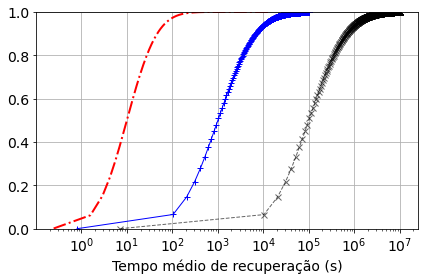

In [9]:
#Plot the distribution of T_off

# Ref to choose the distribution: https://conferences.sigcomm.org/imc/2014/papers/p45.pdf
s1, s2, s3 = 1.2, 1.5, 1.5
loc1, loc2, loc3 = 0, 0, 0
scale1, scale2, scale3 = 1e1, 1e3, 1e5

fig, ax = plt.subplots(1, 1)

x = np.linspace(lognorm.ppf(0.001,s1,loc1,scale1),lognorm.ppf(0.999999999,s1,loc1,scale1), 10000)
y = np.linspace(lognorm.ppf(0.000001,s2,loc2,scale2),lognorm.ppf(0.999,s2,loc2,scale2), 1000)
z = np.linspace(lognorm.ppf(0.0000000001, s3, loc3, scale3),lognorm.ppf(0.999, s3, loc3, scale3), 1000)
ax.plot(x, lognorm.cdf(x,s1,loc1,scale1),'r-.', lw=2, alpha=1, label= 'High availability')
ax.plot(y, lognorm.cdf(y,s2,loc2,scale2),'b-+', lw=1, alpha=1, label='Medium availability')
ax.plot(z, lognorm.cdf(z,s3,loc3,scale3),'k--x', lw=1, alpha=0.6, label='Low availability')

ax.set_xscale("log")
ax.set_xticks([1,1e1,1e2,1e3,1e4,1e5,1e6,1e7])
ax.set_yticks([0,0.2,0.4,0.6,0.8,1])
#ax.set_xbound(1,1e6)
ax.set_ybound(0,1)
#ax.set_xlabel("Mean time to recover (s)",fontsize=14)
ax.set_xlabel("Tempo médio de recuperação (s)",fontsize=14)
#ax1.set_title("$T_{off}$ cdf")
#ax.legend(loc='best', frameon=False)
ax.grid()

#fig.suptitle('Distributions of how long a node stays offline ($T_{off})$', fontsize=12)
fig.set_size_inches(6, 4)
#fig.set_grid()
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
#plt.savefig('../../t_off_distributions.png', dpi=250)
fig.tight_layout()
plt.savefig('../../t_off_distributions_pt.png', dpi=250)

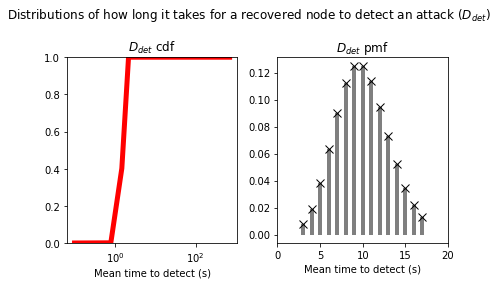

In [144]:
#Plot the distribution of D_det
fig, (ax1, ax2) = plt.subplots(1, 2)

mu = 10
loc = 0
scale = 100



x = np.linspace(expon.ppf(0.001, loc, scale),expon.ppf(0.999, loc, scale), 1000)
#x = np.linspace(1,1e6,1000000)
log_x = np.log10(x)
#print(log_x)
#inv_x = (x**0.9)
y = expon.cdf(x**10, loc, scale)
ax1.plot(x, y,'r-', lw=5, alpha=1, label='D_det cdf')
#ax1.plot(log_x, expon.cdf(log_x, loc, scale),'r-', lw=5, alpha=1, label='D_det cdf')
#ax1.plot(inv_x, expon.cdf(inv_x, loc, scale),'r-', lw=5, alpha=1, label='D_det cdf')
ax1.set_xscale('log')
#ax1.legend(loc='best', frameon=False)
#ax1.set_xticks([0,5,10,15,20])
ax1.set_ybound(0,1)
#ax1.set_xbound(1,1e6)
#ax1.set_ybound(0,1)
ax1.set_xlabel("Mean time to detect (s)")
ax1.set_title("$D_{det}$ cdf")

x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))
ax2.plot(x, poisson.pmf(x, mu), 'kx', ms=8)
ax2.vlines(x, 0, poisson.pmf(x, mu), colors='k', lw=4, alpha=0.5)
#ax2.legend(loc='upper right', frameon=False)
ax2.set_xticks([0,5,10,15,20])
#ax2.set_ybound(0,0.14)
ax2.set_xlabel("Mean time to detect (s)")
ax2.set_title("$D_{det}$ pmf")

fig.suptitle('Distributions of how long it takes for a recovered node to detect an attack ($D_{det})$', fontsize=12)
fig.tight_layout()

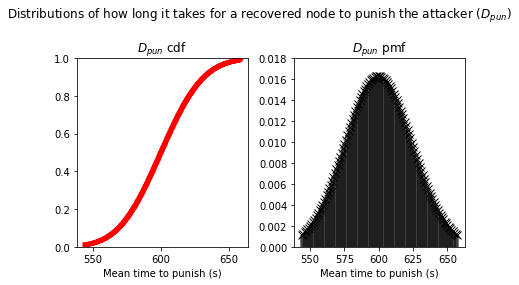

In [4]:
#Plot the distribution of D_pun assuming the 6-block rule
fig, (ax1, ax2) = plt.subplots(1, 2)

mu = 600 

x = np.linspace(poisson.ppf(0.01,mu),poisson.ppf(0.99,mu), 1000)
ax1.plot(x, poisson.cdf(x,mu),'r-', lw=5, alpha=1)
#ax1.legend(loc='best', frameon=False)
#ax1.set_xticks([0,5,10,15,20])
ax1.set_ybound(0,1)
ax1.set_xlabel("Mean time to punish (s)")
ax1.set_title("$D_{pun}$ cdf")

x = np.arange(poisson.ppf(0.01, mu), poisson.ppf(0.99, mu))
ax2.plot(x, poisson.pmf(x, mu), 'kx', ms=8)
ax2.vlines(x, 0, poisson.pmf(x, mu), colors='k', lw=4, alpha=0.5)
#ax2.legend(loc='upper right', frameon=False)
#ax2.set_xticks([0,5,10,15,20])
ax2.set_ybound(0,0.018)
ax2.set_xlabel("Mean time to punish (s)")
ax2.set_title("$D_{pun}$ pmf")

fig.suptitle('Distributions of how long it takes for a recovered node to punish the attacker ($D_{pun})$', fontsize=12)
fig.tight_layout()

In [3]:
n_blocks_for_confirmation = [1, 6]

# Initialize deltas from dataset
balances = pd.read_json('../data/balances.txt')
balances["delta"] = balances["a"] - balances["b"]
balances["delta_abs"] = balances["delta"].apply(lambda x: np.abs(x))
balances["delta_norm_a"] = (balances["a"]/(balances["a"]+balances["b"]))
balances["delta_norm_b"] = (balances["b"]/(balances["a"]+balances["b"]))
balances["delta_norm"] = balances["delta_norm_a"]-balances["delta_norm_b"]
balances["delta_norm_abs"] = balances["delta_norm"].apply(lambda x: np.abs(x))

# Initialize parameters
n = len(balances.index)
t_off_high = lognorm(s1,loc1,scale1).rvs(n)
t_off_med  = lognorm(s2,loc2,scale2).rvs(n)
t_off_low  = lognorm(s3,loc3,scale3).rvs(n)
mean_high, _, _, _ = lognorm.stats(s1,loc1,scale1, moments='mvsk')
mean_med, _, _, _  = lognorm.stats(s2,loc2,scale2, moments='mvsk')
mean_low, _, _, _  = lognorm.stats(s3,loc3,scale3, moments='mvsk')

# Calculte d_dets
num_nodes = 3
block_time = 600
block_size = 10 #Mbits
down_speed_high = 30 #Mbps
down_speed_med = 2 #Mbps
down_speed_low = 1 #Mbps
v = 0

d_det_high_mean = num_nodes * (mean_high/block_time) * ((block_size/down_speed_high) + v)
d_det_med_mean = num_nodes * (mean_med/block_time) * ((block_size/down_speed_med) + v)
d_det_low_mean = num_nodes * (mean_low/block_time) * ((block_size/down_speed_low) + v)

d_det_high = poisson(d_det_high_mean).rvs(n)
d_det_med = poisson(d_det_med_mean).rvs(n)
d_det_low = poisson(d_det_low_mean).rvs(n)


d_pun_1conf = poisson(600*n_blocks_for_confirmation[0]).rvs(n)
d_pun_6conf = poisson(600*n_blocks_for_confirmation[1]).rvs(n)
w = [0] * n


df = pd.DataFrame(
    {'t_off_high': t_off_high,
     't_off_med': t_off_med,
     't_off_low': t_off_low,
     'd_det_high': d_det_high,
     'd_det_med': d_det_med,
     'd_det_low': d_det_low,     
     'd_pun_1conf': d_pun_1conf,
     'd_pun_6conf': d_pun_6conf,
     'a': balances["a"].to_numpy(),
     'b': balances["b"].to_numpy(),
     'delta': balances["delta"].to_numpy(),
     'delta_abs': balances["delta_abs"].to_numpy(),
     'delta_norm_a': balances["delta_norm_a"].to_numpy(),
     'delta_norm_b': balances["delta_norm_b"].to_numpy(),
     'delta_norm': balances["delta_norm"].to_numpy(),
     'delta_norm_abs': balances["delta_norm_abs"].to_numpy(),
     'w': w
    })

0.8166347586296382
0.9777314101029033
[99.0, 100.0]


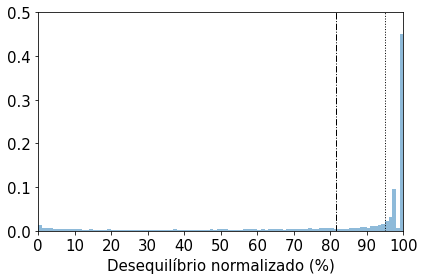

In [10]:
#Plot the distribution of normalized absolute deltas

fig, ax = plt.subplots(1, 1)

#print(df["delta_norm"])

m, bins, patches = ax.hist(df["delta_norm_abs"]*100, bins=100, density=True, histtype='stepfilled', alpha=0.5)
#print(m)

print(df["delta_norm_abs"].mean())
print(np.percentile(df["delta_norm_abs"],50))

x_values = [bins[np.searchsorted(m,0.4)], bins[np.searchsorted(m,1)]]
print(x_values)



#ax.legend(loc='best', frameon=False)
ax.tick_params(axis='both', which='major', labelsize=15)
#ax.set_xlabel("Normalized bias (%)",fontsize=15)
ax.set_xlabel("Desequilíbrio normalizado (%)",fontsize=15)
#ax.set_title("Normalized $\Delta$ PMF")
ax.set_xbound(0,100)
ax.set_xticks([0,10,20,30,40,50,60,70,80,90,100])
ax.set_yticks([0,0.1,0.2,0.3,0.4,0.5])
#ax.set_ybound(0,10)
plt.axvline(95,linestyle=':',color='k',linewidth='1')
plt.axvline(81.6,linestyle='-.',color='k',linewidth='1')
#plt.axvline(26,linestyle='--',color='k',linewidth='1')

#plt.axvline(x_values[1])
#plt.savefig('../../deltas.png', dpi=250)
plt.tight_layout()
plt.savefig('../../deltas-pt.png', dpi=250)

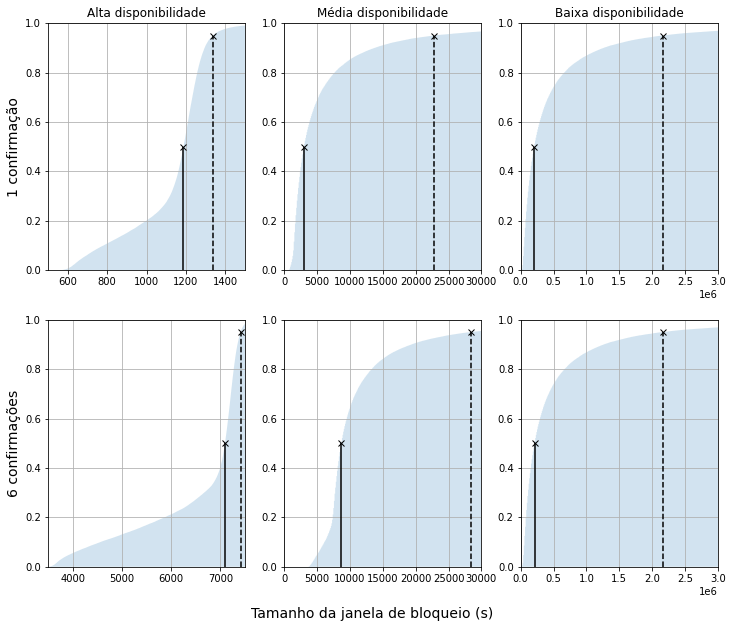

In [7]:
# Calculate and plot time window histogram
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(12, 10)

thresholds = [0.5,0.95]
linestyles = ['k-','k--','k-.']
markers = ['kx','kx','kx']
percentages = [str(int(thresholds[0]*100))+'%',str(int(thresholds[1]*100))+'%']
#percentages = [str(int(thresholds[0]*100))+'%',str(int(thresholds[1]*100))+'%',str(int(thresholds[2]*100))+'%']

# High availability 1-conf
df["w"] = (df["t_off_high"]+df["d_det_high"]+df["d_pun_1conf"])*(1+df["delta_norm_abs"])

m, bins, patches = ax[0][0].hist(df["w"], bins=10000, density=True, cumulative=True, histtype='stepfilled', alpha=0.2)

x_values = [bins[np.searchsorted(m,thresholds[0])], bins[np.searchsorted(m,thresholds[1])]]
#x_values = [bins[np.searchsorted(m,thresholds[0])], bins[np.searchsorted(m,thresholds[1])], bins[np.searchsorted(m,thresholds[2])]]


for xc,l,m,p in zip(x_values,linestyles,markers,thresholds):
    ax[0][0].stem(xc, p, label='W = {0:.0f}'.format(xc)+' ({})'.format(p),linefmt=l,markerfmt=m)
    #ax[0][0].axvline(x=xc, label='W = {0:.0f}'.format(xc)+' ({})'.format(p), linestyle=l, color='k')

#ax[0][0].legend()
ax[0][0].set_xbound(500,1500)
ax[0][0].set_ybound(0,1)
ax[0][0].grid()
ax[0][0].set_title("Alta disponibilidade")
#ax[0][0].set_title("High availability")
#ax[0][0].set_ylabel("1-confirmation",fontsize=14)
ax[0][0].set_ylabel("1 confirmação",fontsize=14)

# Medium availablity 1-conf
df["w"] = (df["t_off_med"]+df["d_det_med"]+df["d_pun_1conf"])*(1+df["delta_norm_abs"])

m, bins, patches = ax[0][1].hist(df["w"], bins=10000,density=True, cumulative=True, histtype='stepfilled', alpha=0.2)

x_values = [bins[np.searchsorted(m,thresholds[0])], bins[np.searchsorted(m,thresholds[1])]]
#x_values = [bins[np.searchsorted(m,thresholds[0])], bins[np.searchsorted(m,thresholds[1])], bins[np.searchsorted(m,thresholds[2])]]

for xc,l,m,p in zip(x_values,linestyles,markers,thresholds):
    ax[0][1].stem(xc, p, label='W = {0:.0f}'.format(xc)+' ({})'.format(p),linefmt=l,markerfmt=m)
    #ax[0][1].axvline(x=xc, label='W = {0:.0f}'.format(xc)+' ({})'.format(p), linestyle=l, color='k')

#ax[0][1].legend()
ax[0][1].set_xbound(0,30000)
ax[0][1].set_ybound(0,1)
ax[0][1].grid()
#ax[0][1].set_title("Medium availability")
ax[0][1].set_title("Média disponibilidade")

# Low availability 1-conf
df["w"] = (df["t_off_low"]+df["d_det_low"]+df["d_pun_1conf"])*(1+df["delta_norm_abs"])

m, bins, patches = ax[0][2].hist(df["w"], bins=10000,density=True, cumulative=True, histtype='stepfilled', alpha=0.2)

x_values = [bins[np.searchsorted(m,thresholds[0])], bins[np.searchsorted(m,thresholds[1])]]
#x_values = [bins[np.searchsorted(m,thresholds[0])], bins[np.searchsorted(m,thresholds[1])], bins[np.searchsorted(m,thresholds[2])]]

for xc,l,m,p in zip(x_values,linestyles,markers,thresholds):
    ax[0][2].stem(xc, p, label='W = {0:.0f}'.format(xc)+' ({})'.format(p),linefmt=l,markerfmt=m)
    #ax[0][2].axvline(x=xc, label='W = {0:.0f}'.format(xc)+' ({})'.format(p), linestyle=l, color='k')

#ax[0][2].legend()
ax[0][2].set_xbound(0,3000000)
ax[0][2].set_ybound(0,1)
ax[0][2].grid()
#ax[0][2].set_title("Low availability")
ax[0][2].set_title("Baixa disponibilidade")


# High availability 6-conf

df["w"] = (df["t_off_high"]+df["d_det_high"]+df["d_pun_6conf"])*(1+df["delta_norm_abs"])

m, bins, patches = ax[1][0].hist(df["w"], bins=10000,density=True, cumulative=True, histtype='stepfilled', alpha=0.2)

x_values = [bins[np.searchsorted(m,thresholds[0])], bins[np.searchsorted(m,thresholds[1])]]
#x_values = [bins[np.searchsorted(m,thresholds[0])], bins[np.searchsorted(m,thresholds[1])], bins[np.searchsorted(m,thresholds[2])]]

for xc,l,m,p in zip(x_values,linestyles,markers,thresholds):
    ax[1][0].stem(xc, p, label='W = {0:.0f}'.format(xc)+' ({})'.format(p),linefmt=l,markerfmt=m)
    #ax[1][0].axvline(x=xc, label='W = {0:.0f}'.format(xc)+' ({})'.format(p), linestyle=l, color='k')

#ax[1][0].legend()
ax[1][0].grid()
ax[1][0].set_xbound(3500,7500)
ax[1][0].set_ybound(0,1)
#ax[1][0].set_ylabel("6-confirmation",fontsize=14)
ax[1][0].set_ylabel("6 confirmações",fontsize=14)


# Medium availability 6-conf
df["w"] = (df["t_off_med"]+df["d_det_med"]+df["d_pun_6conf"])*(1+df["delta_norm_abs"])

m, bins, patches = ax[1][1].hist(df["w"], bins=10000,density=True, cumulative=True, histtype='stepfilled', alpha=0.2)

x_values = [bins[np.searchsorted(m,thresholds[0])], bins[np.searchsorted(m,thresholds[1])]]
#x_values = [bins[np.searchsorted(m,thresholds[0])], bins[np.searchsorted(m,thresholds[1])], bins[np.searchsorted(m,thresholds[2])]]

for xc,l,m,p in zip(x_values,linestyles,markers,thresholds):
    ax[1][1].stem(xc, p, label='W = {0:.0f}'.format(xc)+' ({})'.format(p),linefmt=l,markerfmt=m)
    #ax[1][1].axvline(x=xc, label='W = {0:.0f}'.format(xc)+' ({})'.format(p), linestyle=l, color='k')

#ax[1][1].legend()
ax[1][1].grid()
ax[1][1].set_xbound(0,30000)
ax[1][1].set_ybound(0,1)

# Low availability 6-conf
df["w"] = (df["t_off_low"]+df["d_det_low"]+df["d_pun_6conf"])*(1+df["delta_norm_abs"])

m, bins, patches = ax[1][2].hist(df["w"], bins=10000,density=True, cumulative=True, histtype='stepfilled', alpha=0.2)

#x_values = [bins[np.searchsorted(m,thresholds[0])], bins[np.searchsorted(m,thresholds[1])], bins[np.searchsorted(m,thresholds[2])]]
x_values = [bins[np.searchsorted(m,thresholds[0])], bins[np.searchsorted(m,thresholds[1])]]

for xc,l,m,p in zip(x_values,linestyles,markers,thresholds):
    ax[1][2].stem(xc, p, label='W = {0:.0f}'.format(xc)+' ({})'.format(p),linefmt=l,markerfmt=m)
    #ax[1][2].axvline(x=xc, label='W = {0:.0f}'.format(xc)+' ({})'.format(p), linestyle=l, color='k')

#ax[1][2].legend()
ax[1][2].set_xbound(0,3000000)
ax[1][2].set_ybound(0,1)
ax[1][2].grid()

# plt.xticks(fontsize=14)
# plt.yticks(fontsize=14)

#fig.supxlabel('Minimum window size (s)',fontsize=14,y=0.05)
fig.supxlabel('Tamanho da janela de bloqueio (s)',fontsize=14,y=0.05)
#plt.savefig('../../time_window.png', dpi=250)
plt.savefig('../../time_window_pt.png', dpi=250)

plt.show()

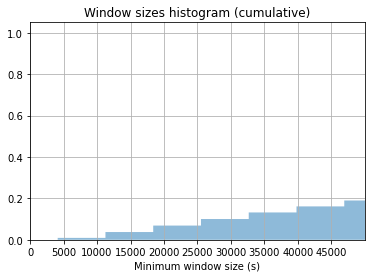

In [156]:
# Plot cumulative histogram of time windows
fig, ax = plt.subplots(1, 1)
plt.grid()

ax.hist(df["w"], bins=10000,density=True, cumulative=True, histtype='stepfilled', alpha=0.5)
#ax.legend(loc='best', frameon=False)
#ax.set_xscale("log")
ax.set_xticks(np.arange(0, 50000, 5000))
ax.set_xbound(0,50000)
ax.set_title("Window sizes histogram (cumulative)")
ax.set_xlabel("Minimum window size (s)")
plt.show()